# Workbook Objective: 
### Examine School data

#### Import Libraries

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
from scipy.stats import shapiro
from scipy import stats


#### Import data

In [194]:
df_school_sat = pd.read_csv('./data-clean/sat_ca_school_2019.csv')
df_school_act = pd.read_csv('./data-clean/act_ca_school_2019.csv')
df_housing = pd.read_csv('./data-clean/housing_values_2021.csv')

In [195]:
df_school_sat.head()

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_eng,pct_eng,avg_math,pct_math,abv_avg_both,abv_pct_both,year,is_charter
0,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,14,13.73,2019,0
1,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,18,15.93,2019,0
2,1.964734e+13,19.0,1964733.0,6061451.0,S,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68,64.15,36,33.96,36,33.96,2019,0
3,3.073635e+13,30.0,3073635.0,3034956.0,S,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161,84.74,138,72.63,132,69.47,2019,0
4,3.367215e+13,33.0,3367215.0,3336955.0,S,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,3,17.65,2,11.76,2,11.76,2019,0


In [196]:
df_school_act.head()

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_num,abv_avg_pct,year,is_charter
0,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2019,0
1,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2019,0
2,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09,2019,1
3,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25,2019,0
4,1.965136e+13,19.0,1965136.0,1996321.0,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,29,29,25,25,34,94.44,2019,0


In [197]:
# merge sat & act
both_scores = pd.merge(
    left=df_school_sat,
    right=df_school_act[['local_id', 'abv_avg_pct']],
    how='left',
    on='local_id'
)

In [198]:
df_school_sat.shape

(1261, 18)

In [199]:
both_scores.shape

(1261, 19)

In [200]:
both_scores.dropna(inplace=True)

In [201]:
both_scores.shape

(994, 19)

In [202]:
both_scores.head()

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_eng,pct_eng,avg_math,pct_math,abv_avg_both,abv_pct_both,year,is_charter,abv_avg_pct
0,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,14,13.73,2019,0,12.90
1,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,18,15.93,2019,0,28.13
2,1.964734e+13,19.0,1964733.0,6061451.0,S,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68,64.15,36,33.96,36,33.96,2019,0,33.93
3,3.073635e+13,30.0,3073635.0,3034956.0,S,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161,84.74,138,72.63,132,69.47,2019,0,79.05
5,1.363107e+13,13.0,1363107.0,1332501.0,S,Calipatria High,Calipatria Unified,Imperial,91.0,27.0,14,51.85,6,22.22,5,18.52,2019,0,47.37


#### Clear linear relationship between SAT & ACT scores

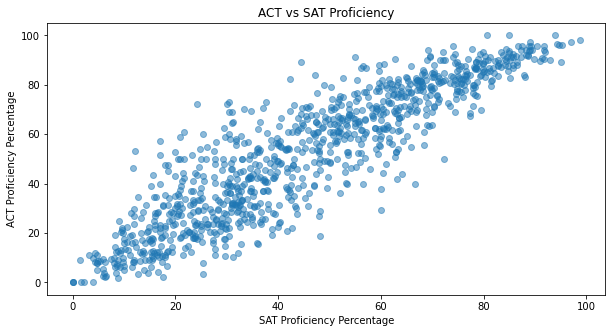

In [203]:
plt.figure(figsize=(10,5))
plt.title('ACT vs SAT Proficiency')
plt.xlabel('SAT Proficiency Percentage')
plt.ylabel('ACT Proficiency Percentage')
plt.scatter(x=both_scores['abv_pct_both'], y=both_scores['abv_avg_pct'], alpha=.5)
plt.show()

In [204]:
both_scores[['abv_pct_both', 'abv_avg_pct']].corr()

,abv_pct_both,abv_avg_pct
abv_pct_both,1.000000,0.898466
abv_avg_pct,0.898466,1.000000


In [205]:
df_school_sat.drop(columns=['local_id', 'county_id', 'county_dist_id', 'school_id', 'record_type', 'year'], inplace=True)
df_school_act.drop(columns=['local_id', 'county_id', 'county_dist_id', 'school_id', 'record_type', 'year'], inplace=True)

In [206]:
def calc_pct_sat(x):
    df = {}
    df['num_schools'] = x['enrollment_12'].count()
    df['enrollment'] = x['enrollment_12'].sum()
    df['test_takers'] = x['test_takers'].sum()
    df['pct_takers'] = x['test_takers'].sum() / x['enrollment_12'].sum()     
    df['avg_eng'] = x['avg_eng'].sum() / x['test_takers'].sum()
    df['avg_math'] = x['avg_math'].sum() / x['test_takers'].sum()
    df['abv_avg_both'] = x['abv_avg_both'].sum() / x['test_takers'].sum()
    # adapted from pretagteam.com
    return pd.Series(df, index=['num_schools', 'enrollment', 'test_takers', 'pct_takers', 'avg_eng', 'avg_math', 'abv_avg_both'])

def calc_pct_act(x):
    df = {}
    df['num_schools'] = x['enrollment_12'].count()
    df['enrollment'] = x['enrollment_12'].sum()
    df['test_takers'] = x['test_takers'].sum()
    df['pct_takers'] = x['test_takers'].sum() / x['enrollment_12'].sum()     
    df['avg_read'] = x['avg_read'].mean()
    df['avg_eng'] = x['avg_eng'].mean()
    df['avg_math'] = x['avg_math'].mean()
    df['avg_sci'] = x['avg_sci'].mean()
    df['abv_avg_pct'] = x['abv_avg_num'].sum() / x['test_takers'].sum()
    # adapted from pretagteam.com
    return pd.Series(df, index=['num_schools', 'enrollment', 'test_takers', 'pct_takers', 'avg_read', 'avg_eng', 'avg_math', 'avg_sci', 'abv_avg_pct'])


##### Source: https://pretagteam.com/question/how-to-use-groupby-to-apply-multiple-functions-to-multiple-columns-in-pandas

In [207]:
school_v_charter_sat = df_school_sat.groupby(by='is_charter').apply(calc_pct_sat)
school_v_charter_act = df_school_act.groupby(by='is_charter').apply(calc_pct_act)

In [208]:
# by state
school_v_charter_sat

,num_schools,enrollment,test_takers,pct_takers,avg_eng,avg_math,abv_avg_both
is_charter,,,,,,,
0,1033.0,382297.0,152427.0,0.398714,0.691649,0.49011,0.464262
1,228.0,32969.0,15785.0,0.478783,0.613557,0.38676,0.361926


In [209]:
# by state
school_v_charter_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_pct
is_charter,,,,,,,,,
0,866.0,354284.0,70281.0,0.198375,22.224018,21.360277,21.600462,21.505774,0.581750
1,150.0,23497.0,10130.0,0.431119,19.826667,19.040000,19.366667,19.366667,0.344126


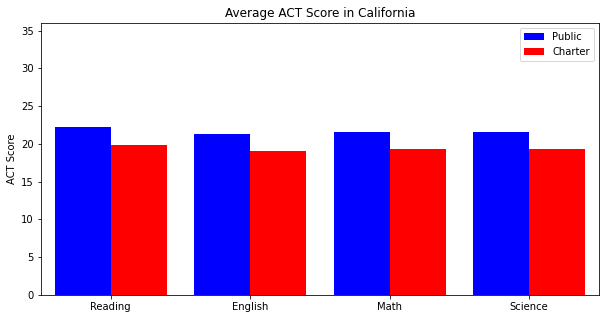

In [210]:
graph_all = school_v_charter_act.rename(columns={'avg_read':'Reading', 'avg_eng':'English', 'avg_math': 'Math', 'avg_sci': 'Science'})

plt.figure(figsize=(10, 5))
plt.title('Average ACT Score in California')
X = np.arange(4)
w = 0.4

ax1 = plt.subplot(1, 1, 1)
plt.xticks(X)
plt.axis([-0.5,3.5,0, 36])
ax1.set_xticklabels(['Reading', 'English', 'Math', 'Science'])
ax1.bar(x=X-.2, width=w, height=graph_all[['Reading', 'English', 'Math', 'Science']].loc[0,], color='blue', label='Public')
ax1.bar(x=X+.2, width=w, height=graph_all[['Reading', 'English', 'Math', 'Science']].loc[1,], color='red', label='Charter')

plt.legend()
plt.ylabel('ACT Score')
plt.show()

In [211]:
num_schools_sat = 1033
num_charter_sat = 228

num_schools_act = 866
num_charter_act = 150

In [212]:
# middle 50% by state
mid_schools_sat = df_school_sat.sort_values(by='abv_pct_both', ascending=False)
mid_schools_act = df_school_act.sort_values(by='abv_avg_pct', ascending=False)

# Filter mid Charter schools
mid_charter_sat = pd.DataFrame(mid_schools_sat[mid_schools_sat['is_charter'] == 1])
mid_charter_sat.reset_index(inplace=True, drop=True)
mid_charter_sat = mid_charter_sat.iloc[int(round(num_charter_sat*.25, 0)):int(round(num_charter_sat*.75, 0))]

# Filter mid non-Charter schools
mid_schools_sat = pd.DataFrame(mid_schools_sat[mid_schools_sat['is_charter'] == 0])
mid_schools_sat.reset_index(inplace=True, drop=True)
mid_schools_sat = mid_schools_sat.iloc[int(round(num_schools_sat*.25, 0)):int(round(num_schools_sat*.75, 0))]

mid_schools_sat = pd.concat([mid_charter_sat, mid_schools_sat])


# Filter mid Charter schools
mid_charter_act = pd.DataFrame(mid_schools_act[mid_schools_act['is_charter'] == 1])
mid_charter_act.reset_index(inplace=True, drop=True)
mid_charter_act = mid_charter_act.iloc[int(round(num_charter_act*.25, 0)):int(round(num_charter_act*.75, 0))]

# Filter mid non-Charter schools
mid_schools_act = pd.DataFrame(mid_schools_act[mid_schools_act['is_charter'] == 0])
mid_schools_act.reset_index(inplace=True, drop=True)
mid_schools_act = mid_schools_act.iloc[int(round(num_schools_act*.25, 0)):int(round(num_schools_act*.75, 0))]

mid_schools_act = pd.concat([mid_charter_act, mid_schools_act])


In [213]:
mid_schools_sat = mid_schools_sat.groupby(by='is_charter').apply(calc_pct_sat)
mid_schools_sat

,num_schools,enrollment,test_takers,pct_takers,avg_eng,avg_math,abv_avg_both
is_charter,,,,,,,
0,517.0,199634.0,75979.0,0.380591,0.694613,0.458469,0.428539
1,114.0,15701.0,7682.0,0.489268,0.563004,0.313851,0.284952


In [214]:
mid_schools_act = mid_schools_act.groupby(by='is_charter').apply(calc_pct_act)
mid_schools_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_pct
is_charter,,,,,,,,,
0,434.0,185043.0,27323.0,0.147658,22.211982,21.235023,21.426267,21.421659,0.565055
1,74.0,9883.0,4798.0,0.485480,19.013514,18.337838,18.702703,18.716216,0.299917


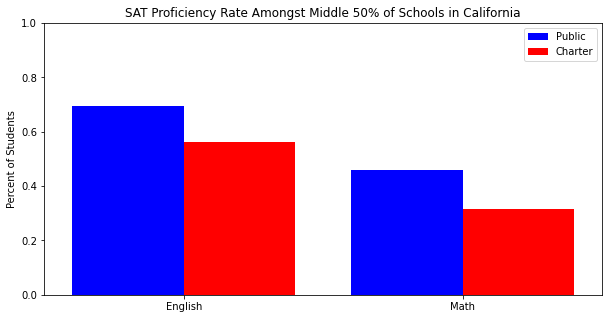

In [215]:
graph_mid = mid_schools_sat.rename(columns={'avg_eng':'English', 'avg_math': 'Math'})

plt.figure(figsize=(10, 5))
plt.title('SAT Proficiency Rate Amongst Middle 50% of Schools in California')
X_2 = np.arange(2)
w_2 = 0.4

ax2 = plt.subplot(1, 1, 1)
plt.xticks(X_2)
plt.axis([-0.5,1.5,0, 1])

ax2.set_xticklabels(['English', 'Math'])
ax2.bar(x=X_2-.2, width=w_2, height=graph_mid[['English', 'Math']].loc[0,], color='blue', label='Public')
ax2.bar(x=X_2+.2, width=w_2, height=graph_mid[['English', 'Math']].loc[1,], color='red', label='Charter')

plt.legend()
plt.ylabel('Percent of Students')
plt.show()


In [216]:
# top 10% by state
top10_schools_sat = df_school_sat.sort_values(by='abv_pct_both', ascending=False)
top10_schools_act = df_school_act.sort_values(by='abv_avg_pct', ascending=False)


# Filter top Charter schools
top10_charter_sat = pd.DataFrame(top10_schools_sat[top10_schools_sat['is_charter'] == 1])
top10_charter_sat.reset_index(inplace=True, drop=True)
top10_charter_sat = top10_charter_sat.iloc[0:int(round(num_charter_sat/10, 0))]

# Filter top non-Charter schools
top10_schools_sat = pd.DataFrame(top10_schools_sat[top10_schools_sat['is_charter'] == 0])
top10_schools_sat.reset_index(inplace=True, drop=True)
top10_schools_sat = top10_schools_sat.iloc[0:int(round(num_schools_sat/10, 0))]

top10_schools_sat = pd.concat([top10_charter_sat, top10_schools_sat])


# Filter top Charter schools
top10_charter_act = pd.DataFrame(top10_schools_act[top10_schools_act['is_charter'] == 1])
top10_charter_act.reset_index(inplace=True, drop=True)
top10_charter_act = top10_charter_act.iloc[0:int(round(num_charter_act/10, 0))]

# Filter top non-Charter schools
top10_schools_act = pd.DataFrame(top10_schools_act[top10_schools_act['is_charter'] == 0])
top10_schools_act.reset_index(inplace=True, drop=True)
top10_schools_act = top10_schools_act.iloc[0:int(round(num_schools_act/10, 0))]

top10_schools_act = pd.concat([top10_charter_act, top10_schools_act])

In [217]:
top10_schools_sat = top10_schools_sat.groupby(by='is_charter').apply(calc_pct_sat)
top10_schools_sat


,num_schools,enrollment,test_takers,pct_takers,avg_eng,avg_math,abv_avg_both
is_charter,,,,,,,
0,103.0,48107.0,18639.0,0.387449,0.941091,0.857932,0.841140
1,23.0,4933.0,2171.0,0.440097,0.909258,0.745739,0.729618


In [218]:
top10_schools_act = top10_schools_act.groupby(by='is_charter').apply(calc_pct_act)
top10_schools_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_pct
is_charter,,,,,,,,,
0,87.0,40446.0,12556.0,0.310439,28.091954,28.241379,27.643678,26.977011,0.915976
1,15.0,3970.0,1039.0,0.261713,27.066667,27.066667,25.666667,25.866667,0.863330


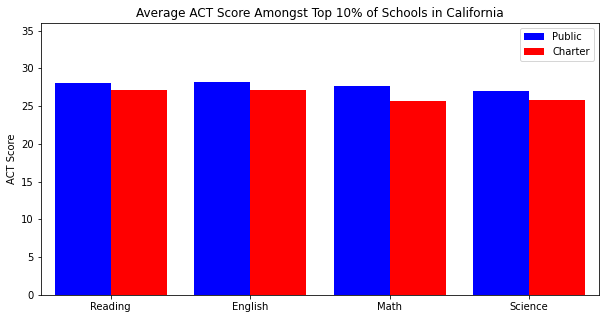

In [219]:
graph_top = top10_schools_act.rename(columns={'avg_read':'Reading', 'avg_eng':'English', 'avg_math': 'Math', 'avg_sci': 'Science'})

plt.figure(figsize=(10, 5))
plt.title('Average ACT Score Amongst Top 10% of Schools in California')
X_3 = np.arange(4)
w_3 = 0.4

ax3 = plt.subplot(1, 1, 1)
plt.xticks(X)
plt.axis([-0.5,3.5,0, 36])
ax3.set_xticklabels(['Reading', 'English', 'Math', 'Science'])
ax3.bar(x=X_3-.2, width=w_3, height=graph_top[['Reading', 'English', 'Math', 'Science']].loc[0,], color='blue', label='Public')
ax3.bar(x=X_3+.2, width=w_3, height=graph_top[['Reading', 'English', 'Math', 'Science']].loc[1,], color='red', label='Charter')

plt.legend()
plt.ylabel('ACT Score')
plt.show()


In [220]:
# bottom 10% by state
bot10_schools_sat = df_school_sat.sort_values(by='abv_pct_both', ascending=True)
bot10_schools_act = df_school_act.sort_values(by='abv_avg_pct', ascending=True)


# Filter bottom Charter schools
bot10_charter_sat = pd.DataFrame(bot10_schools_sat[bot10_schools_sat['is_charter'] == 1])
bot10_charter_sat.reset_index(inplace=True, drop=True)
bot10_charter_sat = bot10_charter_sat.iloc[0:int(round(num_charter_sat/10, 0))]

# Filter bottom non-Charter schools
bot10_schools_sat = pd.DataFrame(bot10_schools_sat[bot10_schools_sat['is_charter'] == 0])
bot10_schools_sat.reset_index(inplace=True, drop=True)
bot10_schools_sat = bot10_schools_sat.iloc[0:int(round(num_schools_sat/10, 0))]

bot10_schools_sat = pd.concat([bot10_charter_sat, bot10_schools_sat])


# Filter bottom Charter schools
bot10_charter_act = pd.DataFrame(bot10_schools_act[bot10_schools_act['is_charter'] == 1])
bot10_charter_act.reset_index(inplace=True, drop=True)
bot10_charter_act = bot10_charter_act.iloc[0:int(round(num_charter_act/10, 0))]

# Filter bottom non-Charter schools
bot10_schools_act = pd.DataFrame(bot10_schools_act[bot10_schools_act['is_charter'] == 0])
bot10_schools_act.reset_index(inplace=True, drop=True)
bot10_schools_act = bot10_schools_act.iloc[0:int(round(num_schools_act/10, 0))]

bot10_schools_act = pd.concat([bot10_charter_act, bot10_schools_act])

In [221]:
bot10_schools_sat = bot10_schools_sat.groupby(by='is_charter').apply(calc_pct_sat)
bot10_schools_sat

,num_schools,enrollment,test_takers,pct_takers,avg_eng,avg_math,abv_avg_both
is_charter,,,,,,,
0,103.0,20551.0,10264.0,0.499440,0.292381,0.099084,0.082034
1,23.0,2189.0,1073.0,0.490178,0.294501,0.079217,0.065238


In [222]:
bot10_schools_act = bot10_schools_act.groupby(by='is_charter').apply(calc_pct_act)
bot10_schools_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_pct
is_charter,,,,,,,,,
0,87.0,21899.0,7291.0,0.332938,16.264368,14.919540,16.45977,16.37931,0.104512
1,15.0,1551.0,1134.0,0.731141,15.266667,13.733333,15.80000,15.60000,0.058201


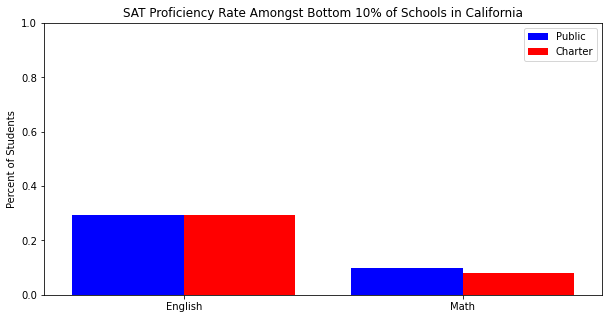

In [223]:
graph_bot = bot10_schools_sat.rename(columns={'avg_eng':'English', 'avg_math': 'Math'})

plt.figure(figsize=(10, 5))
plt.title('SAT Proficiency Rate Amongst Bottom 10% of Schools in California')
X_4 = np.arange(2)
w_4 = 0.4

ax4 = plt.subplot(1, 1, 1)
plt.xticks(X_2)
plt.axis([-0.5,1.5,0, 1])

ax4.set_xticklabels(['English', 'Math'])
ax4.bar(x=X_2-.2, width=w_4, height=graph_bot[['English', 'Math']].loc[0,], color='blue', label='Public')
ax4.bar(x=X_2+.2, width=w_4, height=graph_bot[['English', 'Math']].loc[1,], color='red', label='Charter')

plt.legend()
plt.ylabel('Percent of Students')
plt.show()


In [224]:
# Scores by County
sc_v_ch_county_act = df_school_act.groupby(by=['is_charter', 'county_name']).apply(calc_pct_act)

# Select only Counties with Charter schools
county_w_charter = list(sc_v_ch_county_act.loc[(1,)].index)

# Filter Public schools by Charter only Counties
schools_county_act = sc_v_ch_county_act.loc[(0 , )].loc[county_w_charter]
charters_county_act = sc_v_ch_county_act.loc[(1, )]

#### Filter out Counties with fewer than 100 tests taken by Charter school students

In [225]:
charters_county_act = charters_county_act[charters_county_act['test_takers'] >= 100]
graph_charters = charters_county_act.index
schools_county_act = schools_county_act.loc[graph_charters].sort_values(by='abv_avg_pct', ascending=False)

In [226]:
schools_county_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_pct
county_name,,,,,,,,,
Santa Clara,36.0,16592.0,3816.0,0.229990,26.194444,25.888889,25.833333,25.416667,0.828092
San Mateo,16.0,5916.0,1206.0,0.203854,25.125000,24.875000,24.875000,24.250000,0.777778
Alameda,30.0,12798.0,2865.0,0.223863,24.266667,23.900000,23.866667,23.433333,0.777661
Contra Costa,28.0,11362.0,2787.0,0.245291,23.928571,23.142857,22.857143,22.714286,0.752063
Orange,65.0,34533.0,8156.0,0.236180,23.815385,23.476923,23.476923,23.230769,0.715547
San Diego,64.0,30406.0,6934.0,0.228047,23.000000,22.250000,22.406250,22.359375,0.667868
San Joaquin,21.0,8001.0,950.0,0.118735,22.000000,21.095238,21.476190,21.428571,0.558947
San Francisco,13.0,3737.0,944.0,0.252609,20.230769,19.307692,20.538462,19.923077,0.552966
Sacramento,33.0,12959.0,2696.0,0.208041,22.242424,21.181818,21.727273,21.393939,0.528561


In [227]:
# Re-order to match schools index
charters_county_act = charters_county_act.loc[schools_county_act.index]
charters_county_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_pct
county_name,,,,,,,,,
Santa Clara,8.0,701.0,353.0,0.503566,19.125000,18.750000,19.000000,19.125000,0.317280
San Mateo,5.0,422.0,207.0,0.490521,21.600000,20.600000,20.600000,21.200000,0.463768
Alameda,9.0,909.0,664.0,0.730473,19.111111,18.222222,19.444444,18.777778,0.281627
Contra Costa,4.0,764.0,357.0,0.467277,19.750000,18.500000,19.000000,19.000000,0.361345
Orange,4.0,1214.0,288.0,0.237232,23.500000,23.000000,21.500000,22.250000,0.753472
San Diego,16.0,2826.0,962.0,0.340410,22.500000,21.312500,21.625000,21.625000,0.522869
San Joaquin,5.0,638.0,327.0,0.512539,19.400000,18.200000,18.600000,18.600000,0.370031
San Francisco,3.0,240.0,115.0,0.479167,19.333333,18.000000,18.000000,18.000000,0.330435
Sacramento,5.0,526.0,292.0,0.555133,19.600000,18.600000,19.200000,18.800000,0.226027


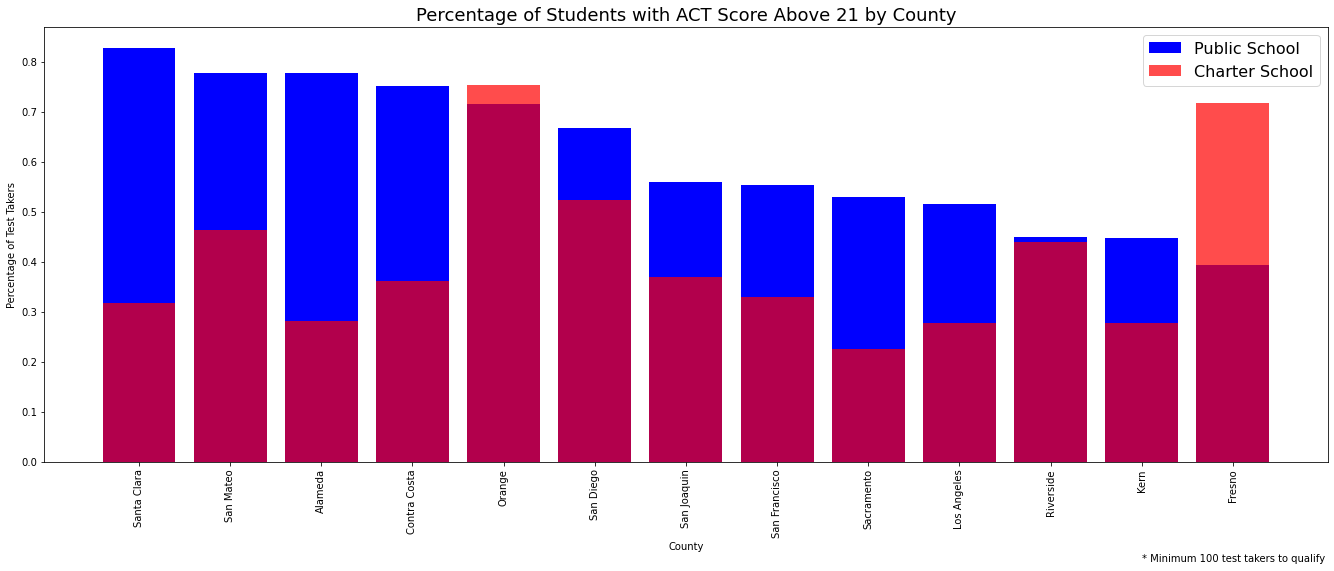

In [228]:
# School vs Charter Delta
# colors = {'traditional':'red', 'charter':'blue'} 

plt.figure(figsize=(23,8))
plt.bar(x=schools_county_act.index, height=schools_county_act['abv_avg_pct'], color='blue', alpha=1, label='Public School')
plt.bar(x=charters_county_act.index, height=charters_county_act['abv_avg_pct'], color='red', alpha=.7, label='Charter School')

plt.xlabel("County")
plt.ylabel("Percentage of Test Takers")

plt.legend(prop={'size': 16})
plt.xticks(rotation=90)
plt.title("Percentage of Students with ACT Score Above 21 by County", size=18)
plt.text(x='Kern', y=-0.2, s='* Minimum 100 test takers to qualify')
plt.show()

In [191]:
df_housing.head()

,county,med_home_value
0,Alameda,854696.0
1,Alpine,419080.0
2,Amador,359884.0
3,Butte,377765.0
4,Calaveras,366538.0


In [238]:
county_sat = df_school_sat.groupby(by=['county_name', 'is_charter']).apply(calc_pct_sat)
best_counties = county_sat.sort_values(by='abv_avg_both', ascending=False)
best_counties[best_counties['test_takers'] > 100]

# Export Best School Counties
best_counties.to_csv('./data-clean/best_counties.csv')